## Introduction - Whether A Customer Will Leave The Bank Soon

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon with the data on clients’ past behavior and termination of contracts with the bank.

We need to build a model with the maximum possible F1 score. The threshold F1 score is at least 0.59.

Additionally, we also need to measure the AUC-ROC metric and compare it with the F1.

### Data Description

Features:
1. RowNumber — data string index
2. CustomerId — unique customer identifier
3. Surname — surname
4. CreditScore — credit score
5. Geography — country of residence
6. Gender — gender
7. Age — age
8. Tenure — period of maturation for a customer’s fixed deposit (years)
9. Balance — account balance
10. NumOfProducts — number of banking products used by the customer
11. HasCrCard — customer has a credit card
12. IsActiveMember — customer’s activeness
13. EstimatedSalary — estimated salary

Target:
1. Exited — сustomer has left

## Initialising & Loading Data

### Initialisation

Loading all libararies for our working.

In [1036]:
# Loading libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import math as mt
import math
from math import factorial
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Load Data

Read & load the raw data

In [1037]:
df = pd.read_csv("/datasets/Churn.csv")

## Preparing the Data

### General Data Info

In [1038]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


(10000, 14)

There are 10,000 rows of records and 14 columns for the dataset that we named as 'df'.

In [1039]:
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


### Changing Data Type

Only 'Tenure' column need to be changed into integer. It will be checked with missing values and changed later.

### Dealing with Missing Values

In [1040]:
# Count missing values for each column
missing_values_count = df.isna().sum()

# Calculate the percentage of missing values for each column
total_cells = len(df)
missing_percentage = (missing_values_count / total_cells) * 100

# Create a DataFrame to display missing value count and percentage
missing_data = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage (%)': missing_percentage.round(2)
})

print(missing_data)

                 Missing Values  Percentage (%)
RowNumber                     0            0.00
CustomerId                    0            0.00
Surname                       0            0.00
CreditScore                   0            0.00
Geography                     0            0.00
Gender                        0            0.00
Age                           0            0.00
Tenure                      909            9.09
Balance                       0            0.00
NumOfProducts                 0            0.00
HasCrCard                     0            0.00
IsActiveMember                0            0.00
EstimatedSalary               0            0.00
Exited                        0            0.00


There are 9% of missing data for 'Tenure'.

In [1041]:
df_na = df[df.isna().any(axis=1)]
df_na.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


In [1042]:
# Dropping the row with missing 'Tenure' with 0 since we do not know the actual tenure and it is important for our analysis.
df.dropna(subset=['Tenure'], inplace=True)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


(9091, 14)

Change the data type of 'Tenure' to integer.

In [1043]:
df['Tenure'] = df['Tenure'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   int64  
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.0+ MB


### Checking the Unique Values for column 'Surname', 'Geography' & 'Gender'

In [1044]:
sorted_surnames = np.sort(df['Surname'].unique())

for surname in sorted_surnames:
    print(surname)

Abazu
Abbie
Abbott
Abdullah
Abdulov
Abel
Abernathy
Abramov
Abramova
Abramovich
Abramowitz
Abrego
Abron
Achebe
Adams
Adamson
Afamefula
Afamefuna
Afanasyev
Afanasyeva
Agafonova
Aguirre
Ah Mouy
Ahern
Ahmed
Aikenhead
Ainsworth
Aitken
Ajuluchukwu
Akabueze
Akeroyd
Akhtar
Akobundu
Aksakova
Aksenov
Aksenova
Aksyonov
Aksyonova
Akubundu
Akudinobi
Alaniz
Alderete
Aldrich
Aldridge
Aleksandrova
Alekseeva
Alekseyeva
Aleshire
Alexander
Alexandrov
Alexandrova
Alexeeva
Alexeieva
Alexeyeva
Algarin
Algeranoff
Ali
Aliyev
Aliyeva
Allan
Allard
Allardyce
Allen
Alleyne
Allingham
Allnutt
Allsop
Alvares
Alvarez
Amadi
Amaechi
Amechi
Amos
Ampt
Anayochukwu
Anayolisa
Anderson
Andreev
Andrejew
Andrews
Andreyev
Andreyeva
Anenechi
Anenechukwu
Angelo
Ankudinov
Ankudinova
Ansell
Anthony
Aparicio
Arbour
Archambault
Archer
Arcuri
Ardis
Argyle
Arkwookerum
Armfield
Armit
Armstrong
Arnold
Arnott
Arrington
Artamonova
Artemiev
Artemieva
Artemova
Artemyeva
Arthur
Artyomova
Ash
Ashbolt
Ashley
Ashton
Astorga
Atherton
Atkins
Atkin

There is no implicit surname after checking.

In [1045]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

There is no implicit geography after checking.

In [1046]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

There is no implicit gender after checking.

### Checking for Duplicates

In [1047]:
df.duplicated().sum()

0

There is no duplicate values.

###  Checking Data Distribution with Initial Descriptive Statistics

In [1048]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9091.000000,9.091000e+03,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,5013.909911,1.569105e+07,650.736553,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938
std,2884.433466,7.161419e+04,96.410471,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2521.500000,1.562899e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000
50%,5019.000000,1.569106e+07,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000
75%,7511.500000,1.575285e+07,717.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000
max,9999.000000,1.581566e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


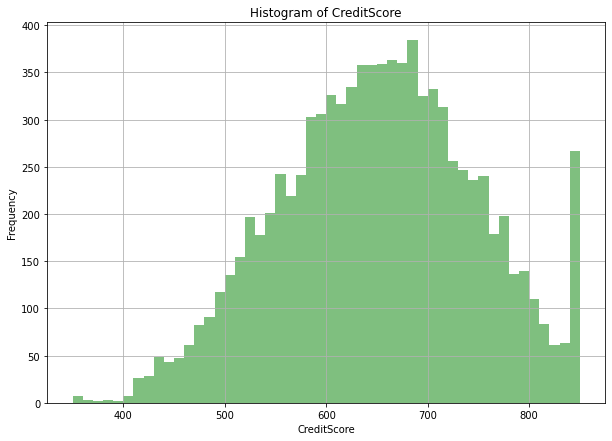

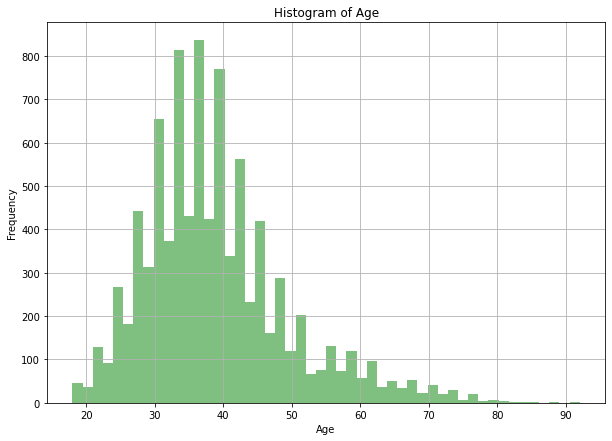

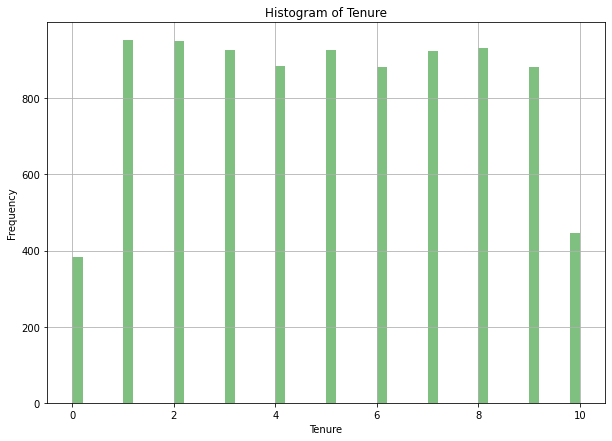

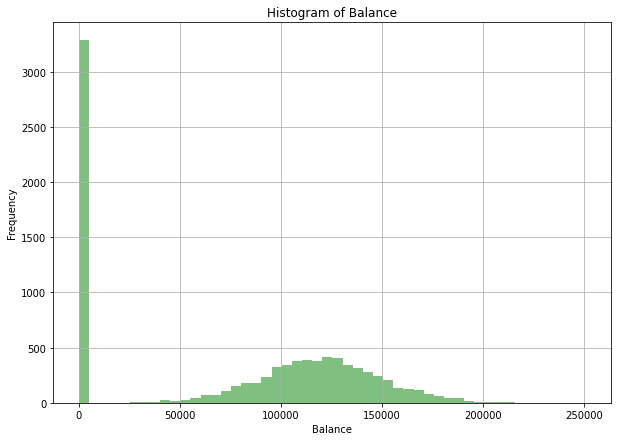

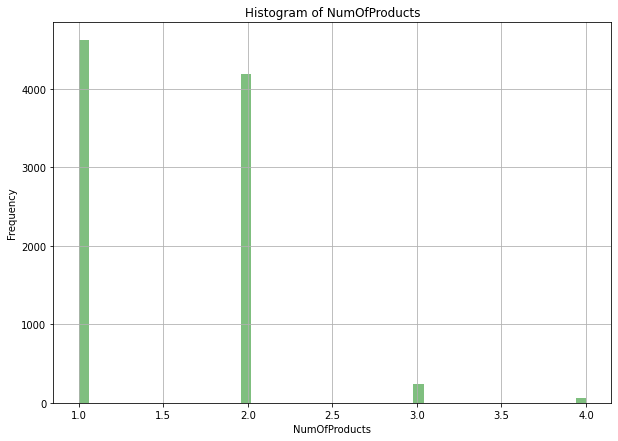

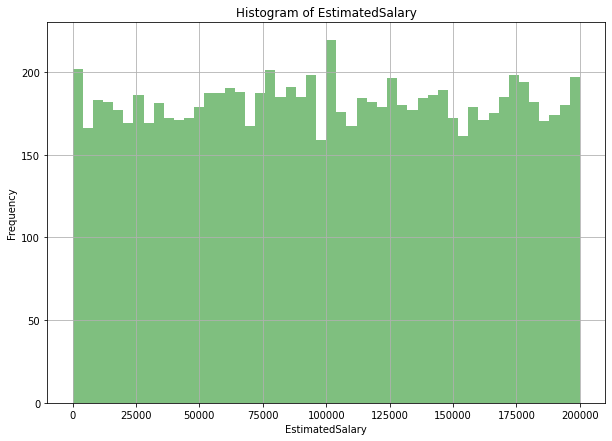

In [1049]:
columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for column in columns:
    plt.figure(figsize=(10, 7))
    plt.tight_layout()
    plt.hist(df[column], bins=50, alpha=0.5, color='g')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

The datas for each columns look fine, with exception that there is a spike on zero account balance (> 3,000) for the data of column 'Balance'. We need to further investigate this.

In [1050]:
# Looking into data with account balance zero
zero_account_balance = df[df['Balance'] == 0]
zero_account_balance

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,4,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,12,15737173,Andrews,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,13,15632264,Kay,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,15605622,McMillan,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.0,2,1,0,96270.64,0


In [1051]:
# Looking at the data that account balance is zero and have left bank
zero_account_balance_churn = df[(df['Balance'] == 0) & (df['Exited'] == 1)]
zero_account_balance_churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1
22,23,15699309,Gerasimov,510,Spain,Female,38,4,0.0,1,1,0,118913.53,1
58,59,15623944,T'ien,511,Spain,Female,66,4,0.0,1,1,0,1643.11,1
81,82,15663706,Leonard,777,France,Female,32,2,0.0,1,1,0,136458.19,1
88,89,15622897,Sharpe,646,France,Female,46,4,0.0,3,1,0,93251.42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,9785,15687626,Zhirov,527,France,Male,39,4,0.0,2,1,0,167183.07,1
9884,9885,15686974,Sergeyeva,751,France,Female,48,4,0.0,1,0,1,30165.06,1
9898,9899,15746569,Tsui,589,France,Male,38,4,0.0,1,1,0,95483.48,1
9962,9963,15594612,Flynn,702,Spain,Male,44,9,0.0,1,0,0,59207.41,1


In [1052]:
# Percentage of zero account balance customer that churned
display('Percentage of zero account balance customer that churned: ', (len(zero_account_balance_churn) / len(zero_account_balance) * 100))

'Percentage of zero account balance customer that churned: '

13.76789521778861

Only 14% of the customers with zero account balance who leaves the bank. Other customers with zero account balance are still staying with bank. Thus, we will remain the data as it is for further analysis.

## Model Development by Using Label Encoding

### Remove The Irrelevant Features from the Original Dataframe

In [1053]:
df_analysis = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df_analysis.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### Label Encoding for New Dataframe, df_analysis

In [1054]:
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(df_analysis), columns=df_analysis.columns)
data_ordinal.shape

(9091, 11)

We use label encoding instead of one-hot encoding as there are too many categorial consideration and it will cause bias or overfitting if using one-hot encoding.

### Model Development without Feature Scaling & Imbalance Consideration

Split the data_ordinal dataset into a training set, a validation set and a testing set in the split ratio of 3:1:1.

In [1055]:
target = data_ordinal['Exited']
features = data_ordinal.drop('Exited', axis=1)

# First split to separate out the training set
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=12345)

# Second split to separate out the validation and test sets
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

In [1056]:
display('features_train: ', features_train.shape)
display('features_valid: ', features_valid.shape)
display('features_test: ', features_test.shape)
display('target_train: ', target_train.shape)
display('target_valid: ', target_valid.shape)
display('target_test: ', target_test.shape)

'features_train: '

(5454, 10)

'features_valid: '

(1818, 10)

'features_test: '

(1819, 10)

'target_train: '

(5454,)

'target_valid: '

(1818,)

'target_test: '

(1819,)

#### Decision Tree Regression

In [1057]:
# < create a loop for max_depth from 1 to 10 >
for depth in range(1, 11):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # < create a model, specify max_depth=depth >

        # < train the model >
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid) # < find the predictions using validation set >

        print("max_depth =", depth, ": ", end='')
        print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.7926292629262927
max_depth = 2 : 0.8305830583058306
max_depth = 3 : 0.8333333333333334
max_depth = 4 : 0.8509350935093509
max_depth = 5 : 0.8558855885588559
max_depth = 6 : 0.8481848184818482
max_depth = 7 : 0.8487348734873488
max_depth = 8 : 0.8426842684268426
max_depth = 9 : 0.8388338833883389
max_depth = 10 : 0.834983498349835


Max_depth of 5 gives the best accuracy, which is 86%.

#### Random Forest Regression

In [1058]:
best_score = 0
best_est = 0
for est in range(1, 100, 10): # choose hyperparameter range
    model = RandomForestClassifier(random_state=54321, n_estimators=est) # set number of trees
    model.fit(features_train,target_train) # train model on training set
    score = model.score(features_valid, target_valid) # calculate accuracy score on validation set
    if score > best_score:
        best_score = score # save best accuracy score on validation set
        best_est = est # save number of estimators corresponding to best accuracy score

print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))

Accuracy of the best model on the validation set (n_estimators = 61): 0.8547854785478548


We are trying to build the model with number of estimators from 1 to 100. And number of estimators 61 gave us the best accuracy score, which is 85%.

#### Logistic Regression

In [1059]:
model = LogisticRegression(random_state=54321, solver='liblinear') # initialize logistic regression constructor with parameters random_state=54321 and solver='liblinear'
model.fit(features_train, target_train)  # train model on training set
score_train = model.score(features_train, target_train) # calculate accuracy score on training set 
score_valid = model.score(features_valid, target_valid) # calculate accuracy score on validation set  

print("Accuracy of the logistic regression model on the training set:",score_train)
print("Accuracy of the logistic regression model on the validation set:",score_valid)

Accuracy of the logistic regression model on the training set: 0.8034470113678035
Accuracy of the logistic regression model on the validation set: 0.8014301430143014


We are trying to build the Logistic Regression model, and the accuracy score on training set and validation set are both 80%.

#### Sanity Checking on all 3 Models

The highest accuracy score are Random Forest Regression model, 0.86 and also Decision Tree Regression model, 0.86. The lowest accuracy score is Logistic Regression model which is 0.79.

We need to do a baseline check for sanity check, called Dummy Classifier.

A Dummy Classifier in machine learning is a type of classifier that does not generate any insight about the data and classifies the given data using only simple rules. It’s used as a simple baseline for other classifiers, meaning any other classifier is expected to perform better on the given dataset. A Dummy Classifier serves as a simple baseline to compare against other (more complex) classifiers. It’s especially useful for datasets where there’s a class imbalance.

The strategy used is ‘most_frequent’, meaning the classifier always predicts the most frequent class label in the training data.

In [1060]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='most_frequent', random_state=42)

#establishing random_state for reproducibility

clf_dummy.fit(features_train, target_train)
y_pred = clf_dummy.predict(features_valid)
score = clf_dummy.score(features_valid, target_valid)
display(score)

0.7926292629262927

Dummy Classifier has achieved an accuracy of approximately 79%. This is the baseline model, and it’s quite common for the baseline model not to have a very high accuracy.

The score we have obtained is the baseline performance. Any other machine learning model we use should ideally perform better than this. If not, we might need to revisit our feature selection, data preprocessing steps, or model choice.

The Dummy Classifier doesn’t learn anything from the data and its predictions are based solely on the class distribution of the training set (or are random, depending on the strategy used). It’s a simple tool to provide a sanity check and a baseline for other models.

#### Section Conclusion

The accuracy for sanity check through Dummy Classifier is 79%, while the accuracy using Decision Tree is 86% and Random Forest models is 85%. Only Logistic Regression model has the lowest accuracy, which is 80%. These models are without feature scaling and imbalance consideration.

### Model Development with Imbalance Fixing

Class Distribution Plot for Target (column name: 'Exited')

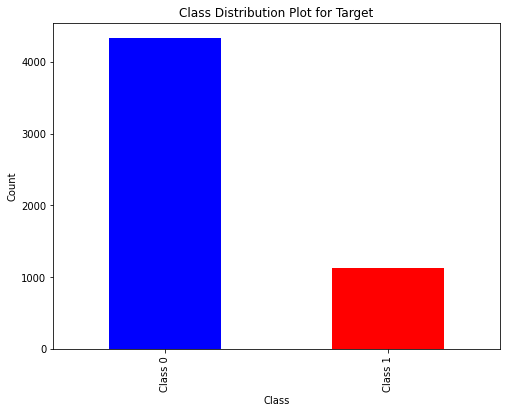

In [1061]:
plt.figure(figsize=(8, 6))
target_train.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution Plot for Target')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

We can observe that the class zero is roughly 4x more than class one.

#### Imbalance Fixing with Feature Scaling

In [1062]:
# Feature Scaling

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()

features_train_scaled = features_train.copy()
features_valid_scaled = features_valid.copy()
features_test_scaled = features_test.copy()

# Replacing on the numeric data with the scaled ones.
features_train_scaled[numeric] = scaler.fit_transform(features_train_scaled[numeric])
features_valid_scaled[numeric] = scaler.transform(features_valid_scaled[numeric])
features_test_scaled[numeric] = scaler.transform(features_test_scaled[numeric])

Decision Tree Regression

In [1063]:
# < create a loop for max_depth from 1 to 10 >
for depth in range(1, 11):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # < create a model, specify max_depth=depth >

        # < train the model >
        model.fit(features_train_scaled, target_train)
        predictions_valid = model.predict(features_valid_scaled) # < find the predictions using validation set >

        print("max_depth =", depth, ": ", end='')
        print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.7926292629262927
max_depth = 2 : 0.8305830583058306
max_depth = 3 : 0.8333333333333334
max_depth = 4 : 0.8509350935093509
max_depth = 5 : 0.8558855885588559
max_depth = 6 : 0.8481848184818482
max_depth = 7 : 0.8487348734873488
max_depth = 8 : 0.8426842684268426
max_depth = 9 : 0.8388338833883389
max_depth = 10 : 0.8355335533553355


Max_depth of 5 gave the best accuracy of 85.6%.

Imbalance Checking using Confusion Matrix, F1 Score & AUC-ROC for Decision Tree Model

'Confusion Matrix: '

array([[1395,   46],
       [ 216,  161]])

'F1 Score: '

0.5513698630136986

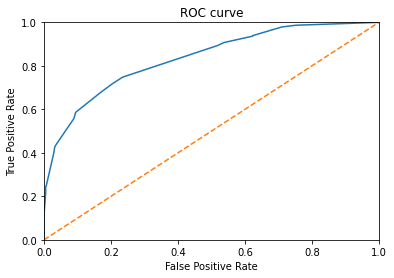

0.8349528860189559

In [1064]:
model = DecisionTreeClassifier(random_state=12345, max_depth=5)
model.fit(features_train_scaled, target_train)
predictions_valid = model.predict(features_valid_scaled)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,395 true negative values while only detected 161 true positive values.
2. F1 Score: 0.55
3. AUC-ROC: 0.83

Random Forest Regression

Imbalance Checking using Confusion Matrix, F1 Score & AUC-ROC for Random Forest Model

'Confusion Matrix: '

array([[1412,   29],
       [ 229,  148]])

'F1 Score: '

0.5342960288808665

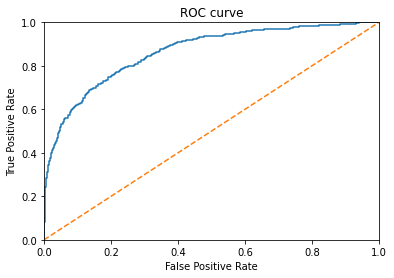

0.8640698601214527

In [1065]:
model = RandomForestClassifier(random_state=54321, n_estimators=50, max_depth=8)
model.fit(features_train_scaled,target_train)
predictions_valid = model.predict(features_valid_scaled)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,412 true negative values while only detected 148 true positive values.
2. F1 Score: 0.53
3. AUC-ROC: 0.86

Logistic Regression

In [1066]:
model = LogisticRegression(random_state=54321, solver='liblinear') # initialize logistic regression constructor with parameters random_state=54321 and solver='liblinear'
model.fit(features_train_scaled, target_train)  # train model on training set
score_train = model.score(features_train_scaled, target_train) # calculate accuracy score on training set 
score_valid = model.score(features_valid_scaled, target_valid) # calculate accuracy score on validation set  

print("Accuracy of the logistic regression model on the training set:",score_train)
print("Accuracy of the logistic regression model on the validation set:",score_valid)

Accuracy of the logistic regression model on the training set: 0.8027136046938027
Accuracy of the logistic regression model on the validation set: 0.7970297029702971


We are trying to build the Logistic Regression model, and the accuracy score on training set is 0.80 and on validation set is 0.79.

Imbalance Checking using Confusion Matrix, F1 Score & AUC-ROC for Logistic Regression Model

'Confusion Matrix: '

array([[1399,   42],
       [ 327,   50]])

'F1 Score: '

0.21321961620469088

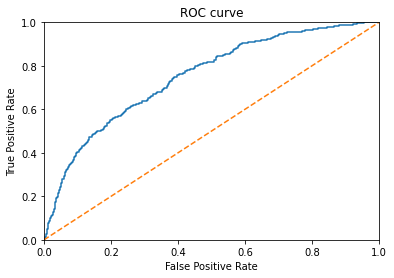

0.7502139871184356

In [1067]:
model = LogisticRegression(random_state=54321, solver='liblinear')
model.fit(features_train_scaled,target_train)
predictions_valid = model.predict(features_valid_scaled)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,399 true negative values while only detected 50 true positive values.
2. F1 Score: 0.21
3. AUC-ROC: 0.75

Section Conclusion:

1. With the feature scaling only, the F1 Score for Decision Tree model is 0.55 while the AUC-ROC is 0.83.
2. With the feature scaling only, the F1 Score for Random Forest model is 0.53 while the AUC-ROC is 0.86.
3. With the feature scaling only, the F1 Score for Logistic Regression model is 0.21 while the AUC-ROC is 0.75.

##### Feature Scaling + Class Weight Adjustment

In [1068]:
# Feature Scaling

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()

features_train_scaled = features_train.copy()
features_valid_scaled = features_valid.copy()
features_test_scaled = features_test.copy()

# Replacing on the numeric data with the scaled ones.
features_train_scaled[numeric] = scaler.fit_transform(features_train_scaled[numeric])
features_valid_scaled[numeric] = scaler.transform(features_valid_scaled[numeric])
features_test_scaled[numeric] = scaler.transform(features_test_scaled[numeric])

Decision Tree Regression

In [1069]:
# < create a loop for max_depth from 1 to 10 >
for depth in range(1, 11):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') # < create a model, specify max_depth=depth >

        # < train the model >
        model.fit(features_train_scaled, target_train)
        predictions_valid = model.predict(features_valid_scaled) # < find the predictions using validation set >

        print("max_depth =", depth, ": ", end='')
        print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.7321232123212321
max_depth = 2 : 0.7392739273927392
max_depth = 3 : 0.7667766776677668
max_depth = 4 : 0.6705170517051705
max_depth = 5 : 0.7909790979097909
max_depth = 6 : 0.7953795379537953
max_depth = 7 : 0.7282728272827282
max_depth = 8 : 0.7678767876787679
max_depth = 9 : 0.7200220022002201
max_depth = 10 : 0.7524752475247525


Max_depth of 6 gave the best accuracy of 80%.

Imbalance Checking using Confusion Matrix & F1 Score for Decision Tree Model

'Confusion Matrix: '

array([[1195,  246],
       [ 126,  251]])

'F1 Score: '

0.574370709382151

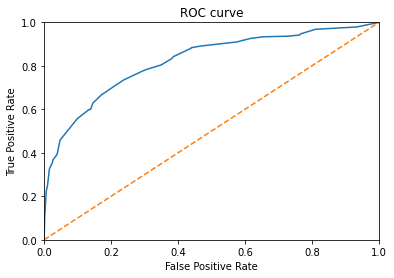

0.8220759235499956

In [1070]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6, class_weight='balanced')
model.fit(features_train_scaled, target_train)
predictions_valid = model.predict(features_valid_scaled)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,195 true negative values while only detected 251 true positive values.
2. F1 Score: 0.57
3. AUC-ROC: 0.82

Random Forest Regression

Imbalance Checking using Confusion Matrix & F1 Score for Random Forest Model

'Confusion Matrix: '

array([[1234,  207],
       [ 115,  262]])

'F1 Score: '

0.6193853427895981

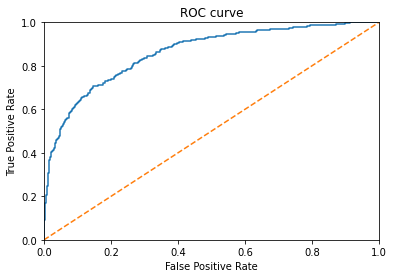

0.8612240615399342

In [1071]:
model = RandomForestClassifier(random_state=54321, n_estimators=50, max_depth=8, class_weight='balanced')
model.fit(features_train_scaled,target_train)
predictions_valid = model.predict(features_valid_scaled)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,234 true negative values while only detected 262 true positive values.
2. F1 Score: 0.62
3. AUC-ROC: 0.86

Logistic Regression

In [1072]:
model = LogisticRegression(random_state=54321, solver='liblinear', class_weight='balanced') # initialize logistic regression constructor with parameters random_state=54321 and solver='liblinear'
model.fit(features_train_scaled, target_train)  # train model on training set
score_train = model.score(features_train_scaled, target_train) # calculate accuracy score on training set 
score_valid = model.score(features_valid_scaled, target_valid) # calculate accuracy score on validation set  

print("Accuracy of the logistic regression model on the training set:",score_train)
print("Accuracy of the logistic regression model on the validation set:",score_valid)

Accuracy of the logistic regression model on the training set: 0.7004033736707004
Accuracy of the logistic regression model on the validation set: 0.6881188118811881


We are trying to build the Logistic Regression model, and the accuracy score on training set is 0.70 and on validation set is 0.69.

Imbalance Checking using Confusion Matrix & F1 Score for Logistic Regression Model

'Confusion Matrix: '

array([[990, 451],
       [116, 261]])

'F1 Score: '

0.47933884297520657

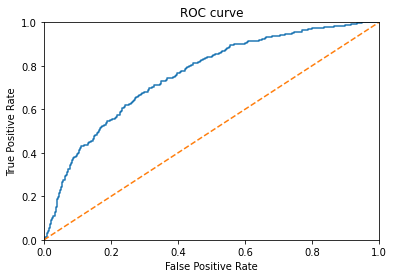

0.7569327224499639

In [1073]:
model = LogisticRegression(random_state=54321, solver='liblinear', class_weight='balanced')
model.fit(features_train_scaled,target_train)
predictions_valid = model.predict(features_valid_scaled)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,033 true negative values while only detected 252 true positive values.
2. F1 Score: 0.48
3. AUC-ROC: 0.76

Section Conclusion:

1. With the Feature Scaling & Class Weight Adjustment, the F1 Score for Decision Tree model is 0.57 while the AUC-ROC is 0.82.
2. With the Feature Scaling & Class Weight Adjustment, the F1 Score for Random Forest model is 0.62 while the AUC-ROC is 0.86.
3. With the Feature Scaling & Class Weight Adjustment, the F1 Score for Logistic Regression model is 0.48 while the AUC-ROC is 0.76.

##### Feature Scaling + Upsampling for Imbalance Fixing

In [1074]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(features_train, target_train, 4) 
# repeat number 4 is chosen as the class zero is around 4x higher than class one.

# Feature Scaling
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_valid_scaled = scaler.transform(features_valid[numeric])
features_train_upsampled_scaled = scaler.transform(features_upsampled[numeric])

In [1075]:
# < create a loop for max_depth from 1 to 10 >
for depth in range(1, 11):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # < create a model, specify max_depth=depth >

        # < train the model >
        model.fit(features_train_upsampled_scaled, target_upsampled)
        predictions_valid = model.predict(features_valid_scaled) # < find the predictions using validation set >

        print("max_depth =", depth, ": ", end='')
        print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.7321232123212321
max_depth = 2 : 0.7392739273927392
max_depth = 3 : 0.823982398239824
max_depth = 4 : 0.6974697469746974
max_depth = 5 : 0.7717271727172718
max_depth = 6 : 0.7491749174917491
max_depth = 7 : 0.7392739273927392
max_depth = 8 : 0.7414741474147415
max_depth = 9 : 0.7491749174917491
max_depth = 10 : 0.7288228822882288


Max_depth of 3 gave the best accuracy of 82%.

Imbalance Checking using Confusion Matrix,F1 Score & AUC-ROC for Decision Tree Model

'Confusion Matrix: '

array([[1277,  164],
       [ 156,  221]])

'F1 Score: '

0.5800524934383202

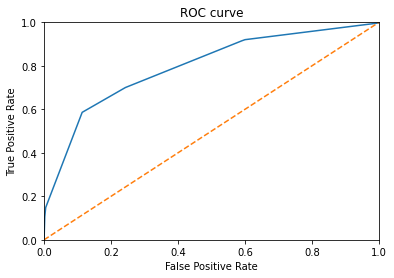

0.796536445917862

In [1076]:
model = DecisionTreeClassifier(random_state=12345, max_depth=3)
model.fit(features_train_upsampled_scaled, target_upsampled)
predictions_valid = model.predict(features_valid_scaled)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,277 true negative values while only detected 221 true positive values.
2. F1 Score: 0.58
3. AUC-ROC: 0.80

Random Forest Regression

Imbalance Checking using Confusion Matrix, F1 Score & AUC-ROC for Random Forest Model

'Confusion Matrix: '

array([[1144,  297],
       [ 102,  275]])

'F1 Score: '

0.5795574288724974

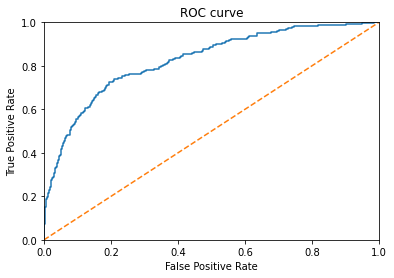

0.8264633497589539

In [1077]:
model = RandomForestClassifier(random_state=54321, n_estimators=50, max_depth=8)
model.fit(features_train_upsampled_scaled,target_upsampled)
predictions_valid = model.predict(features_valid_scaled)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,144 true negative values while only detected 275 true positive values.
2. F1 Score: 0.58
3. AUC-ROC: 0.83

Logistic Regression

In [1078]:
model = LogisticRegression(random_state=54321, solver='liblinear') # initialize logistic regression constructor with parameters random_state=54321 and solver='liblinear'
model.fit(features_train_upsampled_scaled,target_upsampled)  # train model on training set
score_train = model.score(features_train_upsampled_scaled, target_upsampled) # calculate accuracy score on training set 
score_valid = model.score(features_valid_scaled, target_valid) # calculate accuracy score on validation set  

print("Accuracy of the logistic regression model on the training set:",score_train)
print("Accuracy of the logistic regression model on the validation set:",score_valid)

Accuracy of the logistic regression model on the training set: 0.6843297101449275
Accuracy of the logistic regression model on the validation set: 0.6925192519251925


We are trying to build the Logistic Regression model, and the accuracy score on training set and validation set are both 0.69.

Imbalance Checking using Confusion Matrix, F1 Score & AUC-ROC for Logistic Regression Model

'Confusion Matrix: '

array([[1003,  438],
       [ 121,  256]])

'F1 Score: '

0.4780578898225957

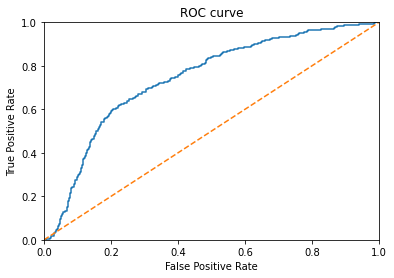

0.7405647787327175

In [1079]:
model = LogisticRegression(random_state=54321, solver='liblinear')
model.fit(features_train_upsampled_scaled,target_upsampled)
predictions_valid = model.predict(features_valid_scaled)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,003 true negative values while only detected 256 true positive values.
2. F1 Score: 0.48
3. AUC-ROC: 0.74

Section Conclusion:

1. With the Feature Scaling & upsampling, the F1 Score for Decision Tree model is 0.58 while the AUC-ROC is 0.80.
2. With the Feature Scaling & Class upsampling, the F1 Score for Random Forest model is 0.58 while the AUC-ROC is 0.83.
3. With the Feature Scaling & upsampling, the F1 Score for Logistic Regression model is 0.48 while the AUC-ROC is 0.74.

##### Feature Scaling + Downsampling for Imbalance Fixing

In [1080]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25) 
# fraction number 0.25 is chosen as the class zero is around 4x higher than class one.


# Feature Scaling
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_valid_scaled = scaler.transform(features_valid[numeric])
features_train_downsampled_scaled = scaler.transform(features_downsampled[numeric])

In [1081]:
# < create a loop for max_depth from 1 to 10 >
for depth in range(1, 11):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # < create a model, specify max_depth=depth >

        # < train the model >
        model.fit(features_train_downsampled_scaled, target_downsampled)
        predictions_valid = model.predict(features_valid_scaled) # < find the predictions using validation set >

        print("max_depth =", depth, ": ", end='')
        print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.6875687568756875
max_depth = 2 : 0.6925192519251925
max_depth = 3 : 0.8030803080308031
max_depth = 4 : 0.6903190319031903
max_depth = 5 : 0.6947194719471947
max_depth = 6 : 0.7205720572057206
max_depth = 7 : 0.7051705170517052
max_depth = 8 : 0.713971397139714
max_depth = 9 : 0.6947194719471947
max_depth = 10 : 0.693069306930693


Max_depth of 3 gave the best accuracy of 80%.

Imbalance Checking using Confusion Matrix,F1 Score & AUC-ROC for Decision Tree Model

'Confusion Matrix: '

array([[1221,  220],
       [ 138,  239]])

'F1 Score: '

0.5717703349282297

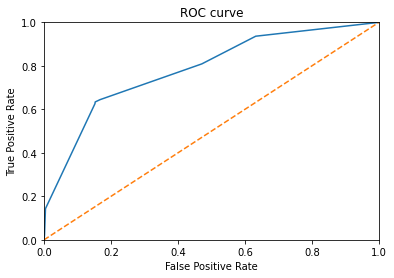

0.784358968223143

In [1082]:
model = DecisionTreeClassifier(random_state=12345, max_depth=3)
model.fit(features_train_downsampled_scaled, target_downsampled)
predictions_valid = model.predict(features_valid_scaled)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,221 true negative values while only detected 239 true positive values.
2. F1 Score: 0.57
3. AUC-ROC: 0.78

Random Forest Regression

Imbalance Checking using Confusion Matrix, F1 Score & AUC-ROC for Random Forest Model

'Confusion Matrix: '

array([[1082,  359],
       [  91,  286]])

'F1 Score: '

0.5596868884540117

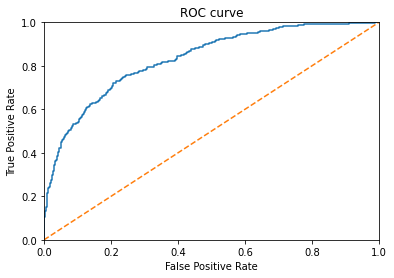

0.8325746377865356

In [1083]:
model = RandomForestClassifier(random_state=54321, n_estimators=50, max_depth=8)
model.fit(features_train_downsampled_scaled, target_downsampled)
predictions_valid = model.predict(features_valid_scaled)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,082 true negative values while only detected 286 true positive values.
2. F1 Score: 0.56
3. AUC-ROC: 0.83

Logistic Regression

In [1084]:
model = LogisticRegression(random_state=54321, solver='liblinear') # initialize logistic regression constructor with parameters random_state=54321 and solver='liblinear'
model.fit(features_train_downsampled_scaled, target_downsampled)  # train model on training set
score_train = model.score(features_train_downsampled_scaled, target_downsampled) # calculate accuracy score on training set 
score_valid = model.score(features_valid_scaled, target_valid) # calculate accuracy score on validation set  

print("Accuracy of the logistic regression model on the training set:",score_train)
print("Accuracy of the logistic regression model on the validation set:",score_valid)

Accuracy of the logistic regression model on the training set: 0.6825181159420289
Accuracy of the logistic regression model on the validation set: 0.6886688668866887


We are trying to build the Logistic Regression model, and the accuracy score on training set is 0.69 and on validation set is 0.68.

Imbalance Checking using Confusion Matrix, F1 Score & AUC-ROC for Logistic Regression Model

'Confusion Matrix: '

array([[990, 451],
       [115, 262]])

'F1 Score: '

0.48073394495412836

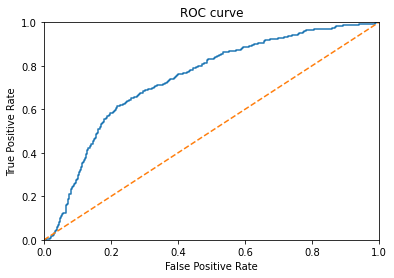

0.739079293962158

In [1085]:
model = LogisticRegression(random_state=54321, solver='liblinear')
model.fit(features_train_downsampled_scaled, target_downsampled)
predictions_valid = model.predict(features_valid_scaled)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 990 true negative values while only detected 262 true positive values.
2. F1 Score: 0.48
3. AUC-ROC: 0.74

Section Conclusion:

1. With the Feature Scaling & upsampling, the F1 Score for Decision Tree model is 0.57 while the AUC-ROC is 0.78.
2. With the Feature Scaling & Class upsampling, the F1 Score for Random Forest model is 0.56 while the AUC-ROC is 0.83.
3. With the Feature Scaling & upsampling, the F1 Score for Logistic Regression model is 0.48 while the AUC-ROC is 0.74.

#### Imbalance Fixing without Feature Scaling

##### Class Weight Adjustment without Feature Scaling

Decision Tree Regression Model

In [1086]:
# < create a loop for max_depth from 1 to 10 >
for depth in range(1, 11):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') # < create a model, specify max_depth=depth >

        # < train the model >
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid) # < find the predictions using validation set >

        print("max_depth =", depth, ": ", end='')
        print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.7321232123212321
max_depth = 2 : 0.7392739273927392
max_depth = 3 : 0.7667766776677668
max_depth = 4 : 0.6705170517051705
max_depth = 5 : 0.7909790979097909
max_depth = 6 : 0.7953795379537953
max_depth = 7 : 0.7282728272827282
max_depth = 8 : 0.7678767876787679
max_depth = 9 : 0.7189218921892189
max_depth = 10 : 0.7519251925192519


We will use max_depth 6 since it gives the best accuracy of 80%.

'Confusion Matrix: '

array([[1195,  246],
       [ 126,  251]])

'F1 Score: '

0.574370709382151

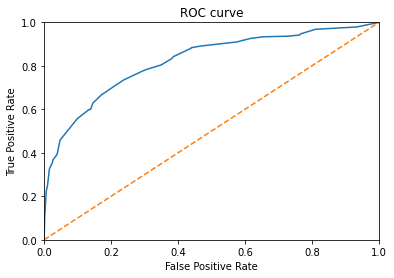

0.8220759235499956

In [1087]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6, class_weight='balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,195 true negative values while only detected 251 true positive values. 
2. F1 Score: 0.57
3. AUC-ROC: 0.82

Random Forest Regression Model

'Confusion Matrix: '

array([[1235,  206],
       [ 115,  262]])

'F1 Score: '

0.6201183431952663

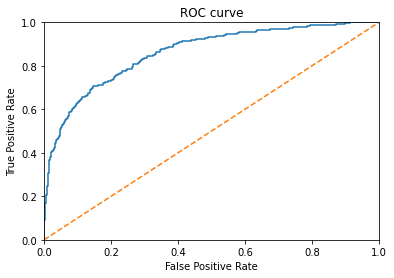

0.8611044128285508

In [1088]:
model = RandomForestClassifier(random_state=54321, n_estimators=50, max_depth=8, class_weight='balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,235 true negative values while only detected 262 true positive values.
2. F1 Score: 0.62
3. AUC-ROC: 0.86

Logistic Regression Model

'Confusion Matrix: '

array([[991, 450],
       [116, 261]])

'F1 Score: '

0.4797794117647059

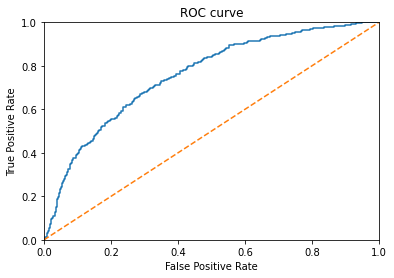

0.757002670927388

In [1089]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 991 true negative values while only detected 261 true positive values.
2. F1 Score: 0.48
3. AUC-ROC: 0.76

Section Conclusion

1. With the Class Weight Adjustment, the F1 Score for Decision Tree model is 0.57 while the AUC-ROC is 0.82.

3. The F1 Score for class weight adjusted Random Forest Model is 0.62 while the AUC-ROC is 0.86.

4. The F1 Score for class weight adjusted Logistic Regression model is 0.48 while the AUC-ROC is 0.76.

##### Upsampling for Imbalance Fixing without Feature Scaling

In [1090]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(features_train, target_train, 4) # repeat number 4 is chosen as the class zero is around 4x higher than class one.

Decision Tree Regression Model

'Confusion Matrix: '

array([[1099,  342],
       [ 100,  277]])

'F1 Score: '

0.5562248995983935

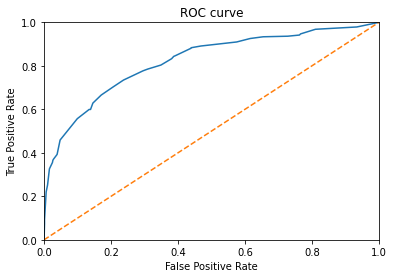

0.8220823661729162

In [1091]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6) # max_depth is taken from the first model without feature scaling & imbalance consideration
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,099 true negative values while only detected 277 true positive values.
2. F1 Score: 0.56
3. AUC-ROC: 0.82

Random Forest Regression Model

'Confusion Matrix: '

array([[1178,  263],
       [ 100,  277]])

'F1 Score: '

0.604143947655398

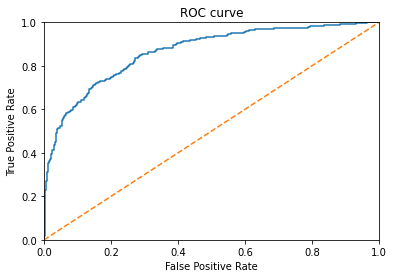

0.8652092840037037

In [1092]:
model = RandomForestClassifier(random_state=54321, n_estimators=50, max_depth=8)
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,178 true negative values while only detected 277 true positive values.
2. F1 Score: 0.60
3. AUC-ROC: 0.87

Logistic Regression Model

'Confusion Matrix: '

array([[972, 469],
       [112, 265]])

'F1 Score: '

0.47704770477047703

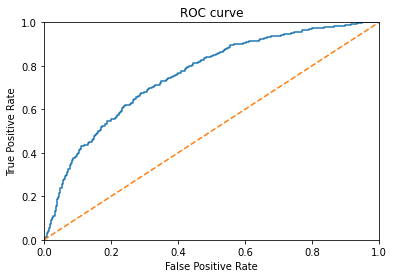

0.7571315233858009

In [1093]:
model = LogisticRegression(random_state=54321, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 972 true negative values while only detected 265 true positive values.
2. F1 Score: 0.48
3. AUC-ROC: 0.76

Section Conclusion

1. With the upsampling method, the F1 Score for Decision Tree model is 0.56 while the AUC-ROC is 0.82.
2. With the upsampling method, the F1 Score for Random Forest model is 0.60 while the AUC-ROC is 0.87.
3. With the upsampling method, the F1 Score for Logistic Regression model is 0.48 while the AUC-ROC is 0.76.

##### Downsampling for Imbalance Fixing without Feature Scaling

In [1094]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25) # fraction number 0.25 is chosen as the class zero is around 5x higher than class one.

Decision Tree Regression Model

'Confusion Matrix: '

array([[1013,  428],
       [  81,  296]])

'F1 Score: '

0.5376930063578564

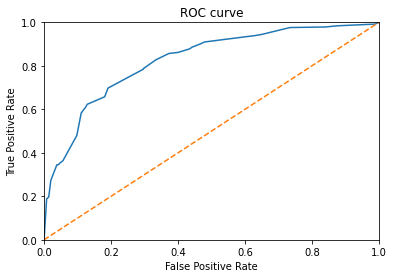

0.8258098837198601

In [1095]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6) # max_depth is taken from the first model without feature scaling & imbalance consideration
model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,013 true negative values while only detected 296 true positive values.
2. F1 Score: 0.54
3. AUC-ROC: 0.83

Random Forest Regression Model

'Confusion Matrix: '

array([[1092,  349],
       [  78,  299]])

'F1 Score: '

0.5834146341463415

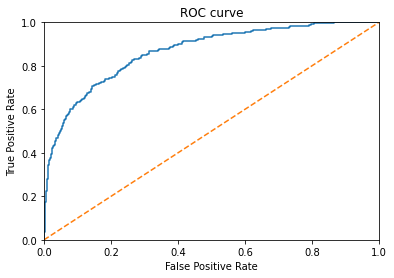

0.8660284174893282

In [1096]:
model = RandomForestClassifier(random_state=54321, n_estimators=50, max_depth=8)
model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))

# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 1,092 true negative values while only detected 299 true positive values.
2. F1 Score: 0.58
3. AUC-ROC: 0.87

Logistic Regression Model

'Confusion Matrix: '

array([[947, 494],
       [112, 265]])

'F1 Score: '

0.4665492957746478

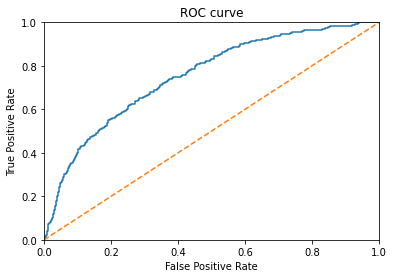

0.7529585444826299

In [1097]:
model = LogisticRegression(random_state=54321, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)

display('Confusion Matrix: ', confusion_matrix(target_valid, predictions_valid))
display('F1 Score: ', f1_score(target_valid, predictions_valid))


# ROC Curve & Score
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
display(auc_roc)

1. From the confusion matrix, it detected 947 true negative values while only detected 265 true positive values.
2. F1 Score: 0.47
3. AUC-ROC: 0.75

Section Conclusion

1. With the downsampling method, the F1 Score for Decision Tree model is 0.54 while the AUC-ROC is 0.83.
2. With the downsampling method, the F1 Score for Random Forest model is 0.58 while the AUC-ROC is 0.87.
3. With the downsampling method, the F1 Score for Logistic Regression model is 0.47 while the AUC-ROC is 0.75.

## Model Development by Using One Hot Encoding for Logistic Regression Only

### One Hot Encoding for New Dataframe, df_analysis

In [1098]:
data_ohe = pd.get_dummies(df_analysis, drop_first=True)
data_ohe.shape

(9091, 12)

We use one-hot encoding to test on Logistic Regression model only, with or without imbalance consideration.

### Model Development without Feature Scaling & Imbalance Consideration

Split the data_ohe dataset into a training set, a validation set and a testing set in the split ratio of 3:1:1.

In [1099]:
target_ohe = data_ohe['Exited']
features_ohe = data_ohe.drop('Exited', axis=1)

# First split to separate out the training set
features_ohe_train, features_ohe_temp, target_ohe_train, target_ohe_temp = train_test_split(features_ohe, target_ohe, test_size=0.4, random_state=12345)

# Second split to separate out the validation and test sets
features_ohe_valid, features_ohe_test, target_ohe_valid, target_ohe_test = train_test_split(features_ohe_temp, target_ohe_temp, test_size=0.5, random_state=12345)

#### Logistic Regression

In [1100]:
model = LogisticRegression(random_state=54321, solver='liblinear') # initialize logistic regression constructor with parameters random_state=54321 and solver='liblinear'
model.fit(features_ohe_train, target_ohe_train)  # train model on training set
score_train_ohe = model.score(features_ohe_train, target_ohe_train) # calculate accuracy score on training set 
score_valid_ohe = model.score(features_ohe_valid, target_ohe_valid) # calculate accuracy score on validation set  

print("Accuracy of the logistic regression model on the training set:",score_train_ohe)
print("Accuracy of the logistic regression model on the validation set:",score_valid_ohe)

Accuracy of the logistic regression model on the training set: 0.7882288228822882
Accuracy of the logistic regression model on the validation set: 0.7887788778877888


We are trying to build the Logistic Regression model, and the accuracy score on training set and validation set are both 79%.

Imbalance Checking using Confusion Matrix, F1 Score & AUC-ROC for Logistic Regression Model

'Confusion Matrix: '

array([[1419,   22],
       [ 362,   15]])

'F1 Score: '

0.07246376811594203

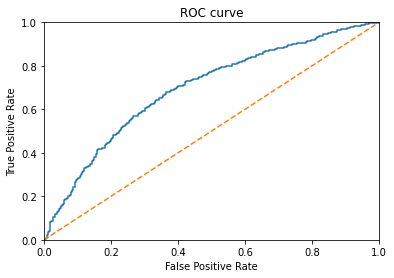

0.693795017827658

In [1101]:
model = LogisticRegression(random_state=54321, solver='liblinear')
model.fit(features_ohe_train, target_ohe_train)
predictions_valid_ohe = model.predict(features_ohe_valid)

display('Confusion Matrix: ', confusion_matrix(target_ohe_valid, predictions_valid_ohe))
display('F1 Score: ', f1_score(target_ohe_valid, predictions_valid_ohe))

# ROC Curve & Score
probabilities_valid_ohe = model.predict_proba(features_ohe_valid)
probabilities_one_valid_ohe = probabilities_valid_ohe[:, 1]

fpr, tpr, thresholds = roc_curve(target_ohe_valid, probabilities_one_valid_ohe) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_ohe_valid, probabilities_one_valid_ohe)
display(auc_roc)

1. From the confusion matrix, it detected 1,419 true negative values while only detected 15 true positive values.
2. F1 Score: 0.07
3. AUC-ROC: 0.69

### Model Development with Imbalance Fixing

#### Imbalance Fixing with Feature Scaling

In [1102]:
# Feature Scaling

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()

features_ohe_train_scaled = features_ohe_train.copy()
features_ohe_valid_scaled = features_ohe_valid.copy()
features_ohe_test_scaled = features_ohe_test.copy()

# Replacing on the numeric data with the scaled ones.
features_ohe_train_scaled[numeric] = scaler.fit_transform(features_ohe_train_scaled[numeric])
features_ohe_valid_scaled[numeric] = scaler.transform(features_ohe_valid_scaled[numeric])
features_ohe_test_scaled[numeric] = scaler.transform(features_ohe_test_scaled[numeric])

Logistic Regression

In [1103]:
model = LogisticRegression(random_state=54321, solver='liblinear') # initialize logistic regression constructor with parameters random_state=54321 and solver='liblinear'
model.fit(features_ohe_train_scaled, target_ohe_train)  # train model on training set
score_train_ohe = model.score(features_ohe_train_scaled, target_ohe_train) # calculate accuracy score on training set 
score_valid_ohe = model.score(features_ohe_valid_scaled, target_ohe_valid) # calculate accuracy score on validation set  

print("Accuracy of the logistic regression model on the training set:",score_train_ohe)
print("Accuracy of the logistic regression model on the validation set:",score_valid_ohe)

Accuracy of the logistic regression model on the training set: 0.8049138247158049
Accuracy of the logistic regression model on the validation set: 0.8085808580858086


We are trying to build the Logistic Regression model, and the accuracy score on training set is 0.80 and on validation set is 0.80.

Imbalance Checking using Confusion Matrix, F1 Score & AUC-ROC for Logistic Regression Model

'Confusion Matrix: '

array([[1394,   47],
       [ 301,   76]])

'F1 Score: '

0.30400000000000005

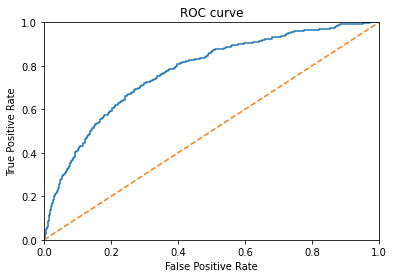

0.7736191158144302

In [1104]:
model = LogisticRegression(random_state=54321, solver='liblinear')
model.fit(features_ohe_train_scaled, target_ohe_train)
predictions_valid_ohe = model.predict(features_ohe_valid_scaled)

display('Confusion Matrix: ', confusion_matrix(target_ohe_valid, predictions_valid_ohe))
display('F1 Score: ', f1_score(target_ohe_valid, predictions_valid_ohe))

# ROC Curve & Score
probabilities_valid_ohe = model.predict_proba(features_ohe_valid_scaled)
probabilities_one_valid_ohe = probabilities_valid_ohe[:, 1]

fpr, tpr, thresholds = roc_curve(target_ohe_valid, probabilities_one_valid_ohe) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_ohe_valid, probabilities_one_valid_ohe)
display(auc_roc)

1. From the confusion matrix, it detected 1,394 true negative values while only detected 76 true positive values.
2. F1 Score: 0.30
3. AUC-ROC: 0.77

##### Feature Scaling + Class Weight Adjustment

In [1105]:
# Feature Scaling

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()

features_ohe_train_scaled = features_ohe_train.copy()
features_ohe_valid_scaled = features_ohe_valid.copy()
features_ohe_test_scaled = features_ohe_test.copy()

# Replacing on the numeric data with the scaled ones.
features_ohe_train_scaled[numeric] = scaler.fit_transform(features_ohe_train_scaled[numeric])
features_ohe_valid_scaled[numeric] = scaler.transform(features_ohe_valid_scaled[numeric])
features_ohe_test_scaled[numeric] = scaler.transform(features_ohe_test_scaled[numeric])

Logistic Regression

In [1106]:
model = LogisticRegression(random_state=54321, solver='liblinear', class_weight='balanced') # initialize logistic regression constructor with parameters random_state=54321 and solver='liblinear'
model.fit(features_ohe_train_scaled, target_ohe_train)  # train model on training set
score_train_ohe = model.score(features_ohe_train_scaled, target_ohe_train) # calculate accuracy score on training set 
score_valid_ohe = model.score(features_ohe_valid_scaled, target_ohe_valid) # calculate accuracy score on validation set  

print("Accuracy of the logistic regression model on the training set:",score_train_ohe)
print("Accuracy of the logistic regression model on the validation set:",score_valid_ohe)

Accuracy of the logistic regression model on the training set: 0.7097543087642098
Accuracy of the logistic regression model on the validation set: 0.7090209020902091


We are trying to build the Logistic Regression model, and the accuracy score on training set is 0.70 and on validation set is 0.70.

Imbalance Checking using Confusion Matrix & F1 Score for Logistic Regression Model

'Confusion Matrix: '

array([[1014,  427],
       [ 102,  275]])

'F1 Score: '

0.509731232622799

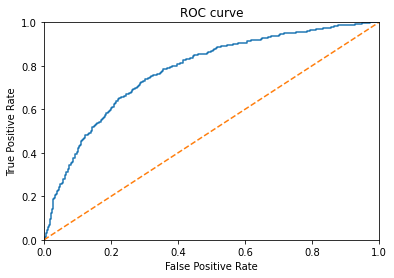

0.7777884132187896

In [1107]:
model = LogisticRegression(random_state=54321, solver='liblinear', class_weight='balanced')
model.fit(features_ohe_train_scaled, target_ohe_train)
predictions_valid_ohe = model.predict(features_ohe_valid_scaled)

display('Confusion Matrix: ', confusion_matrix(target_ohe_valid, predictions_valid_ohe))
display('F1 Score: ', f1_score(target_ohe_valid, predictions_valid_ohe))

# ROC Curve & Score
probabilities_valid_ohe = model.predict_proba(features_ohe_valid_scaled)
probabilities_one_valid_ohe = probabilities_valid_ohe[:, 1]

fpr, tpr, thresholds = roc_curve(target_ohe_valid, probabilities_one_valid_ohe) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_ohe_valid, probabilities_one_valid_ohe)
display(auc_roc)

1. From the confusion matrix, it detected 1,033 true negative values while only detected 252 true positive values.
2. F1 Score: 0.51
3. AUC-ROC: 0.78

##### Feature Scaling + Upsampling for Imbalance Fixing

In [1108]:
def upsample(features_ohe, target_ohe, repeat):
    features_ohe_zeros = features_ohe[target_ohe == 0]
    features_ohe_ones = features_ohe[target_ohe == 1]
    target_ohe_zeros = target_ohe[target_ohe == 0]
    target_ohe_ones = target_ohe[target_ohe == 1]

    features_ohe_upsampled = pd.concat([features_ohe_zeros] + [features_ohe_ones] * repeat)
    target_ohe_upsampled = pd.concat([target_ohe_zeros] + [target_ohe_ones] * repeat)

    features_ohe_upsampled, target_ohe_upsampled = shuffle(features_ohe_upsampled, target_ohe_upsampled, random_state=12345)

    return features_ohe_upsampled, target_ohe_upsampled


features_ohe_upsampled, target_ohe_upsampled = upsample(features_ohe_train, target_ohe_train, 4) 
# repeat number 4 is chosen as the class zero is around 4x higher than class one.

# Feature Scaling
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_ohe_train[numeric])
features_ohe_valid_scaled = scaler.transform(features_ohe_valid[numeric])
features_ohe_train_upsampled_scaled = scaler.transform(features_ohe_upsampled[numeric])

Logistic Regression

In [1109]:
model = LogisticRegression(random_state=54321, solver='liblinear') # initialize logistic regression constructor with parameters random_state=54321 and solver='liblinear'
model.fit(features_ohe_train_upsampled_scaled,target_ohe_upsampled)  # train model on training set
score_train_ohe = model.score(features_ohe_train_upsampled_scaled, target_ohe_upsampled) # calculate accuracy score on training set 
score_valid_ohe = model.score(features_ohe_valid_scaled, target_ohe_valid) # calculate accuracy score on validation set  

print("Accuracy of the logistic regression model on the training set:",score_train_ohe)
print("Accuracy of the logistic regression model on the validation set:",score_valid_ohe)

Accuracy of the logistic regression model on the training set: 0.6901041666666666
Accuracy of the logistic regression model on the validation set: 0.6881188118811881


We are trying to build the Logistic Regression model, and the accuracy score on training set and validation set are both 0.69.

Imbalance Checking using Confusion Matrix, F1 Score & AUC-ROC for Logistic Regression Model

'Confusion Matrix: '

array([[993, 448],
       [119, 258]])

'F1 Score: '

0.47645429362880887

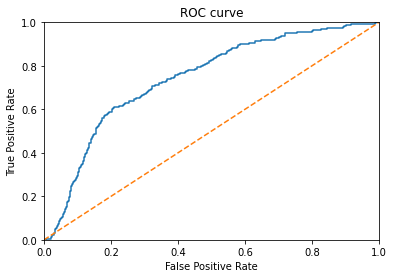

0.7423484649070329

In [1110]:
model = LogisticRegression(random_state=54321, solver='liblinear')
model.fit(features_ohe_train_upsampled_scaled,target_ohe_upsampled)
predictions_valid_ohe = model.predict(features_ohe_valid_scaled)

display('Confusion Matrix: ', confusion_matrix(target_ohe_valid, predictions_valid_ohe))
display('F1 Score: ', f1_score(target_ohe_valid, predictions_valid_ohe))

# ROC Curve & Score
probabilities_valid_ohe = model.predict_proba(features_ohe_valid_scaled)
probabilities_one_valid_ohe = probabilities_valid_ohe[:, 1]

fpr, tpr, thresholds = roc_curve(target_ohe_valid, probabilities_one_valid_ohe) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_ohe_valid, probabilities_one_valid_ohe)
display(auc_roc)

1. From the confusion matrix, it detected 1,393 true negative values while only detected 6 true positive values.
2. F1 Score: 0.48
3. AUC-ROC: 0.74

##### Feature Scaling + Downsampling for Imbalance Fixing

In [1111]:
def downsample(features_ohe, target_ohe, fraction):
    features_ohe_zeros = features_ohe[target_ohe == 0]
    features_ohe_ones = features_ohe[target_ohe == 1]
    target_ohe_zeros = target_ohe[target_ohe == 0]
    target_ohe_ones = target_ohe[target_ohe == 1]

    features_ohe_downsampled = pd.concat([features_ohe_zeros.sample(frac=fraction, random_state=12345)] + [features_ohe_ones])
    target_ohe_downsampled = pd.concat([target_ohe_zeros.sample(frac=fraction, random_state=12345)] + [target_ohe_ones])

    features_ohe_downsampled, target_ohe_downsampled = shuffle(features_ohe_downsampled, target_ohe_downsampled, random_state=12345)

    return features_ohe_downsampled, target_ohe_downsampled


features_ohe_downsampled, target_ohe_downsampled = downsample(features_ohe_train, target_ohe_train, 0.25) 
# fraction number 0.25 is chosen as the class zero is around 4x higher than class one.


# Feature Scaling
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_ohe_train[numeric])
features_ohe_valid_scaled = scaler.transform(features_ohe_valid[numeric])
features_ohe_train_downsampled_scaled = scaler.transform(features_ohe_downsampled[numeric])

Logistic Regression

In [1112]:
model = LogisticRegression(random_state=54321, solver='liblinear') # initialize logistic regression constructor with parameters random_state=54321 and solver='liblinear'
model.fit(features_ohe_train_downsampled_scaled, target_ohe_downsampled)  # train model on training set
score_train_ohe = model.score(features_ohe_train_downsampled_scaled, target_ohe_downsampled) # calculate accuracy score on training set 
score_valid_ohe = model.score(features_ohe_valid_scaled, target_ohe_valid) # calculate accuracy score on validation set  

print("Accuracy of the logistic regression model on the training set:",score_train_ohe)
print("Accuracy of the logistic regression model on the validation set:",score_valid_ohe)

Accuracy of the logistic regression model on the training set: 0.6897644927536232
Accuracy of the logistic regression model on the validation set: 0.6787678767876788


We are trying to build the Logistic Regression model, and the accuracy score on training set is 0.69 and on validation set is 0.68.

Imbalance Checking using Confusion Matrix, F1 Score & AUC-ROC for Logistic Regression Model

'Confusion Matrix: '

array([[973, 468],
       [116, 261]])

'F1 Score: '

0.47197106690777574

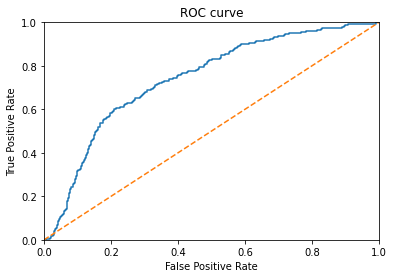

0.7405077155011349

In [1113]:
model = LogisticRegression(random_state=54321, solver='liblinear')
model.fit(features_ohe_train_downsampled_scaled, target_ohe_downsampled)
predictions_valid_ohe = model.predict(features_ohe_valid_scaled)

display('Confusion Matrix: ', confusion_matrix(target_ohe_valid, predictions_valid_ohe))
display('F1 Score: ', f1_score(target_ohe_valid, predictions_valid_ohe))

# ROC Curve & Score
probabilities_valid_ohe = model.predict_proba(features_ohe_valid_scaled)
probabilities_one_valid_ohe = probabilities_valid_ohe[:, 1]

fpr, tpr, thresholds = roc_curve(target_ohe_valid, probabilities_one_valid_ohe) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_ohe_valid, probabilities_one_valid_ohe)
display(auc_roc)

1. From the confusion matrix, it detected 973 true negative values while only detected 261 true positive values.
2. F1 Score: 0.47
3. AUC-ROC: 0.74

#### Imbalance Fixing without Feature Scaling

##### Class Weight Adjustment without Feature Scaling

Logistic Regression Model

'Confusion Matrix: '

array([[1012,  429],
       [ 108,  269]])

'F1 Score: '

0.5004651162790699

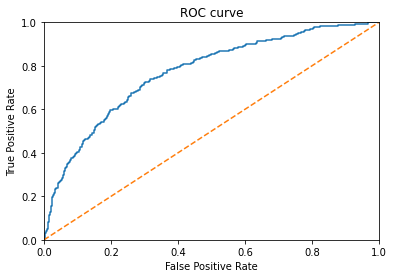

0.7694442961618535

In [1114]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_ohe_train, target_ohe_train)
predictions_valid_ohe = model.predict(features_ohe_valid)

display('Confusion Matrix: ', confusion_matrix(target_ohe_valid, predictions_valid_ohe))
display('F1 Score: ', f1_score(target_ohe_valid, predictions_valid_ohe))

# ROC Curve & Score
probabilities_valid_ohe = model.predict_proba(features_ohe_valid)
probabilities_one_valid_ohe = probabilities_valid_ohe[:, 1]

fpr, tpr, thresholds = roc_curve(target_ohe_valid, probabilities_one_valid_ohe) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_ohe_valid, probabilities_one_valid_ohe)
display(auc_roc)

1. From the confusion matrix, it detected 1,012 true negative values while only detected 269 true positive values.
2. F1 Score: 0.50
3. AUC-ROC: 0.77

##### Upsampling for Imbalance Fixing without Feature Scaling

In [1115]:
def upsample(features_ohe, target_ohe, repeat):
    features_ohe_zeros = features_ohe[target_ohe == 0]
    features_ohe_ones = features_ohe[target_ohe == 1]
    target_ohe_zeros = target_ohe[target_ohe == 0]
    target_ohe_ones = target_ohe[target_ohe == 1]

    features_ohe_upsampled = pd.concat([features_ohe_zeros] + [features_ohe_ones] * repeat)
    target_ohe_upsampled = pd.concat([target_ohe_zeros] + [target_ohe_ones] * repeat)

    features_ohe_upsampled, target_ohe_upsampled = shuffle(features_ohe_upsampled, target_ohe_upsampled, random_state=12345)

    return features_ohe_upsampled, target_ohe_upsampled


features_ohe_upsampled, target_ohe_upsampled = upsample(features_ohe_train, target_ohe_train, 4) 
# repeat number 4 is chosen as the class zero is around 4x higher than class one.

Logistic Regression Model

'Confusion Matrix: '

array([[920, 521],
       [100, 277]])

'F1 Score: '

0.47148936170212763

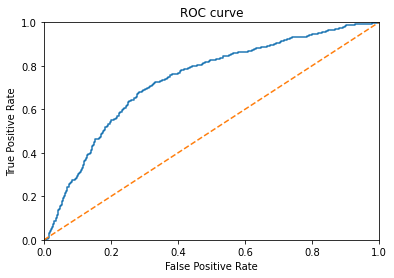

0.7345160761849365

In [1116]:
model = LogisticRegression(random_state=54321, solver='liblinear')
model.fit(features_ohe_upsampled, target_ohe_upsampled)
predictions_valid_ohe = model.predict(features_ohe_valid)

display('Confusion Matrix: ', confusion_matrix(target_ohe_valid, predictions_valid_ohe))
display('F1 Score: ', f1_score(target_ohe_valid, predictions_valid_ohe))

# ROC Curve & Score
probabilities_valid_ohe = model.predict_proba(features_ohe_valid)
probabilities_one_valid_ohe = probabilities_valid_ohe[:, 1]

fpr, tpr, thresholds = roc_curve(target_ohe_valid, probabilities_one_valid_ohe) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_ohe_valid, probabilities_one_valid_ohe)
display(auc_roc)

1. From the confusion matrix, it detected 920 true negative values while only detected 277 true positive values.
2. F1 Score: 0.47
3. AUC-ROC: 0.73

##### Downsampling for Imbalance Fixing without Feature Scaling

In [1117]:
def downsample(features_ohe, target_ohe, fraction):
    features_ohe_zeros = features_ohe[target_ohe == 0]
    features_ohe_ones = features_ohe[target_ohe == 1]
    target_ohe_zeros = target_ohe[target_ohe == 0]
    target_ohe_ones = target_ohe[target_ohe == 1]

    features_ohe_downsampled = pd.concat([features_ohe_zeros.sample(frac=fraction, random_state=12345)] + [features_ohe_ones])
    target_ohe_downsampled = pd.concat([target_ohe_zeros.sample(frac=fraction, random_state=12345)] + [target_ohe_ones])

    features_ohe_downsampled, target_ohe_downsampled = shuffle(features_ohe_downsampled, target_ohe_downsampled, random_state=12345)

    return features_ohe_downsampled, target_ohe_downsampled


features_ohe_downsampled, target_ohe_downsampled = downsample(features_ohe_train, target_ohe_train, 0.25) 
# fraction number 0.25 is chosen as the class zero is around 4x higher than class one.

Logistic Regression Model

'Confusion Matrix: '

array([[904, 537],
       [ 96, 281]])

'F1 Score: '

0.4702928870292888

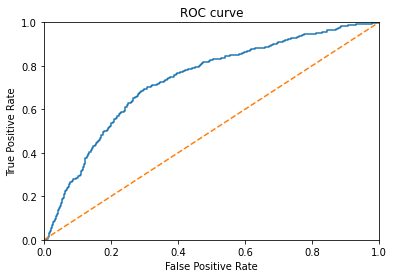

0.7325796078099316

In [1118]:
model = LogisticRegression(random_state=54321, solver='liblinear')
model.fit(features_ohe_downsampled, target_ohe_downsampled)
predictions_valid_ohe = model.predict(features_ohe_valid)

display('Confusion Matrix: ', confusion_matrix(target_ohe_valid, predictions_valid_ohe))
display('F1 Score: ', f1_score(target_ohe_valid, predictions_valid_ohe))


# ROC Curve & Score
probabilities_valid_ohe = model.predict_proba(features_ohe_valid)
probabilities_one_valid_ohe = probabilities_valid_ohe[:, 1]

fpr, tpr, thresholds = roc_curve(target_ohe_valid, probabilities_one_valid_ohe) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_ohe_valid, probabilities_one_valid_ohe)
display(auc_roc)

1. From the confusion matrix, it detected 904 true negative values while only detected 281 true positive values.
2. F1 Score: 0.47
3. AUC-ROC: 0.73

Section conclusion on One-Hot Encoding with and without imbalance consideration on Logistic Regression Model:

1. The F1 Scores & AUC-ROC Scores of model without imbalance consideration on Logistic Regression Model is lower than the model with imbalance consideration (Features scaling, upsampling or downsampling) on Logistic Regression Model.

## Final Model Selection

There is 2 models with the best F1 Score of 0.62 & AUC-ROC score of 0.86. They are model of Random Forest Model with Class Weight Adjustment but without the Feature Scaling and another one is model of Random Forest Model with Class Weight Adjustment but with the Feature Scaling

Other than that, Random Forest Model with Upsampling for Imbalance Fixing without Feature Scaling has F1 Score of 0.60 and AUC-ROC of 0.87.

A. Checking the run time for Random Forest Model with Class Weight Adjustment but without the Feature Scaling.

In [1119]:
%%time

model = RandomForestClassifier(random_state=54321, n_estimators=50, max_depth=8, class_weight='balanced')
model.fit(features_train, target_train)

CPU times: user 351 ms, sys: 2.14 ms, total: 353 ms
Wall time: 363 ms


RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=50,
                       random_state=54321)

The run time for Random Forest Model with Class Weight Adjustment but without the Feature Scaling is 363ms.

B. Checking the run time for Random Forest Model with Class Weight Adjustment but with the Feature Scaling.

In [1120]:
%%time

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(features_train, target_train, 4) 
# repeat number 4 is chosen as the class zero is around 4x higher than class one.

model = RandomForestClassifier(random_state=54321, n_estimators=50, max_depth=8, class_weight='balanced')
model.fit(features_train, target_train)

CPU times: user 345 ms, sys: 0 ns, total: 345 ms
Wall time: 355 ms


RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=50,
                       random_state=54321)

The run time for Random Forest Model with Class Weight Adjustment but without the Feature Scaling is 355ms.

'Confusion Matrix: '

array([[1260,  208],
       [ 118,  233]])

'F1 Score: '

0.5883838383838383

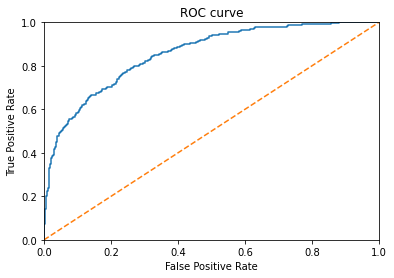

0.8550074912472733

In [1121]:
# Testing the test dataset on Random Forest Model with Class Weight Adjustment but without the Feature Scaling

model = RandomForestClassifier(random_state=54321, n_estimators=50, max_depth=8, class_weight='balanced')
model.fit(features_train, target_train)

predictions_test = model.predict(features_test)

display('Confusion Matrix: ', confusion_matrix(target_test, predictions_test))
display('F1 Score: ', f1_score(target_test, predictions_test))

# ROC Curve & Score
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_test, probabilities_one_test)
display(auc_roc)

Using the final model of Random Forest Model with Class Weight Adjustment but with the Feature Scaling, the F1 score for the test set is 0.59 and the AUC-ROC Score is 0.86.

'Confusion Matrix: '

array([[1260,  208],
       [ 118,  233]])

'F1 Score: '

0.5883838383838383

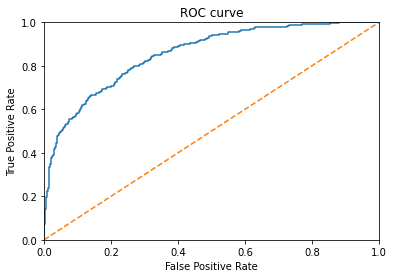

0.8548735803504196

In [1122]:
# Testing the test dataset on Random Forest Model with Class Weight Adjustment but with the Feature Scaling

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(features_train, target_train, 4) # repeat number 4 is chosen as the class zero is around 4x higher than class one.


model = RandomForestClassifier(random_state=54321, n_estimators=50, max_depth=8, class_weight='balanced')
model.fit(features_train_scaled,target_train)

predictions_test = model.predict(features_test_scaled)

display('Confusion Matrix: ', confusion_matrix(target_test, predictions_test))
display('F1 Score: ', f1_score(target_test, predictions_test))

# ROC Curve & Score
probabilities_test = model.predict_proba(features_test_scaled)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()
plt.plot(fpr, tpr)

# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

auc_roc = roc_auc_score(target_test, probabilities_one_test)
display(auc_roc)

Both Random Forest Model with Class Weight Adjustment with or without Feature Scaling showed no significant different for F1 Score (0.59) & AUC-ROC Score (0.86). 

We can use either the model Random Forest Model with Class Weight Adjustment but without the Feature Scaling or the model Random Forest Model with Class Weight Adjustment but with the Feature Scaling since the run time for  for both model is roughly the same.

But choosing the model Random Forest Model with Class Weight Adjustment but without the Feature Scaling is time saving as we no need to scale the features.

## Conclusion

1. The data is loaded and preprocessed. The missing values are removed. There are no duplicated values.

2. There are imbalance of classes. Class zero is around 4x more than class one. 

3. There are different models with Label Encoding, which are both trained with & without considering the imbalance. And with imbalance fixing, we tried both with & without feature scaling, class weight adjustment & up or downsampling methods in combination to train the models. We experimented with both scaled and unscaled data to see which gives better results for our specific use case. The F1 Scores & AUC-ROC Scores of scaled data do not have much different with unscaled data. We shall use unscaled data for modelling in this project.

5. Random Forest model worked the best in this project. And class weight adjusted data model is more suitable for this project compared to Up or Downsampling.

4. We tried to improve the quality of the final model by adjusting the number of estimators & max_depth. 

5. With One-Hot Encoding, the F1 Scores & AUC-ROC Scores of model without imbalance consideration on Logistic Regression Model is lower than the model with imbalance consideration (Features scaling, upsampling or downsampling) on Logistic Regression Model.

6. There are 2 best models using Label Encoding. First model is Random Forest Model with Class Weight Adjustment but without the Feature Scaling, having the run time of 363ms, and F1 Score of 0.62 & AUC-ROC score of 0.86. Second model is Random Forest Model with Class Weight Adjustment but with the Feature Scaling, having the run time of 355ms, and F1 Score of 0.62 & AUC-ROC score of 0.86.

7. The final testing of both models on the testing dataset showed the almost same F1 Score & AUC-ROC score.

8. We can choose the model Random Forest Model with Class Weight Adjustment but without the Feature Scaling as we save the time to scale the features.